**Full Name:- Shruti Shivaji Lanke** <br>

In this assignment, you will need to implement two types of visual analysis based on what you have learned in the class. One is the Word Cloud plotting, and the second one is Mapping the data on the geographical maps.

## 1. Word cloud of human trafficing article on GSU website
Use the following article from GSU website:

https://news.gsu.edu/2019/10/21/homeless-youth-trafficking/

If you can not read the data directly from the blog, you can copy it to a text file and load it here. (Or you can define a text object and insert the text)

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. 

1.1. Use the article above and see which words are bolder than others. Make sure to exclude the stopwords before doing the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

In [2]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


**Copied the article present on the website into a text file for visualisation purposes.**

In [3]:
human_df = pd.read_csv("Human_Trafficking.txt")

print(human_df)

Empty DataFrame
Columns: [ATLANTA—More than half of the homeless youth in metro Atlanta have experienced human trafficking,  with minority and LGBTQ youth being more likely to be forced into working against their will,  according to a study by Georgia State University sociology professor Eric Wright.“Our data suggest that,  at least among the homeless,  they’re more likely to be trafficked for their labor and less frequently for commercial sexual exploitation, ” said Wright,  the principal investigator of the project. “Only one out of four youth were engaging in sex work of some sort,  trafficked or otherwise. The vast majority of youth trafficking experiences involved a wide range of different kinds of labor trafficking.”“They tend to be black or African American,  more often are LGBTQ youth,  and tend to be youth who have been in the juvenile justice or foster care system previously, ” Wright said.The 2018 Atlanta Youth Count is a follow-up to Wright’s 2015 count of Atlanta’s homeles

{'so', 'have', "you've", 'before', 'like', 'up', 'out', 'can', 'myself', 'such', 'here', 'at', "it's", 'theirs', 'had', 'those', "you're", 'an', 'herself', 'on', 'therefore', 'there', 'also', 'any', 'the', 'too', "that's", "they're", 'other', 'otherwise', 'over', 'has', 'who', "who's", 'hence', 'about', 'i', 'their', 'being', "wasn't", "weren't", 'further', "mustn't", 'is', 'few', 'whom', "wouldn't", 'when', 'her', 'each', "won't", 'could', "he's", 'some', "aren't", "we'd", "here's", 'why', 'until', "i've", 'what', 'cannot', "let's", 'which', "she'll", 'to', 'above', 'ever', 'its', 'shall', 'k', "there's", 'since', 'www', 'com', "i'm", 'ought', "they've", 'after', 'both', 'under', 'during', 'r', "what's", 'are', "couldn't", 'my', 'again', 'am', 'your', 'between', 'themselves', 'him', 'or', 'else', 'himself', "she'd", "hadn't", 'this', 'yourself', 'yourselves', "i'd", 'http', 'do', 'into', 'only', "you'll", 'should', "didn't", 'against', 'itself', "we're", 'where', 'through', 'of', "doe

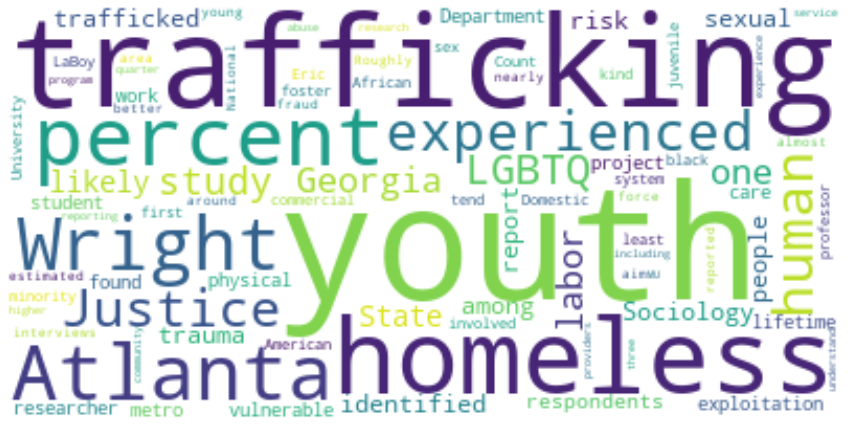

In [4]:
stopwordsm = set(STOPWORDS)
stopword_add = ('will','alomst','often','year','said','less','s')
for word in stopword_add:
    stopwordsm.add(word)
print(STOPWORDS)

words = ''

for line in human_df:
    line = str(line)
    tokens = line.split()

    words = words+" ".join(tokens)+" "
    
humant_wc = WordCloud(background_color='white',
                    stopwords = stopwordsm,
                    min_font_size = 5,
                    collocations = False
                    ).generate(words)

fig = plt.figure(figsize=(15,10))
plt.imshow(humant_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

1.2. Superimpose the words onto a mask of your choice.

In [5]:
# save mask to alice_mask
atl_mask = np.array(Image.open('Atlanta_Map_2.jpg'))

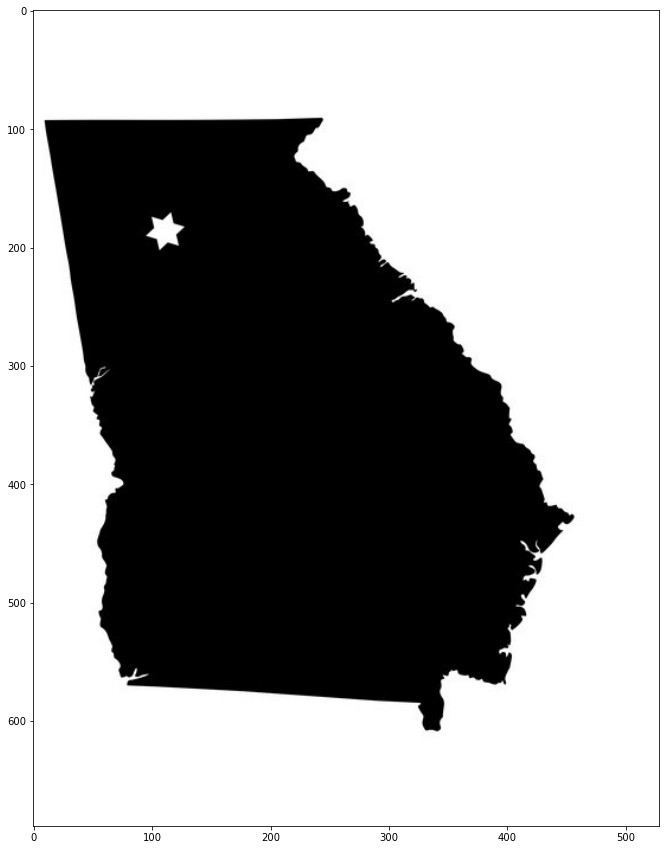

In [6]:
fig = plt.figure(figsize=(20,15))

plt.imshow(atl_mask,cmap=plt.cm.gray,interpolation='bilinear')

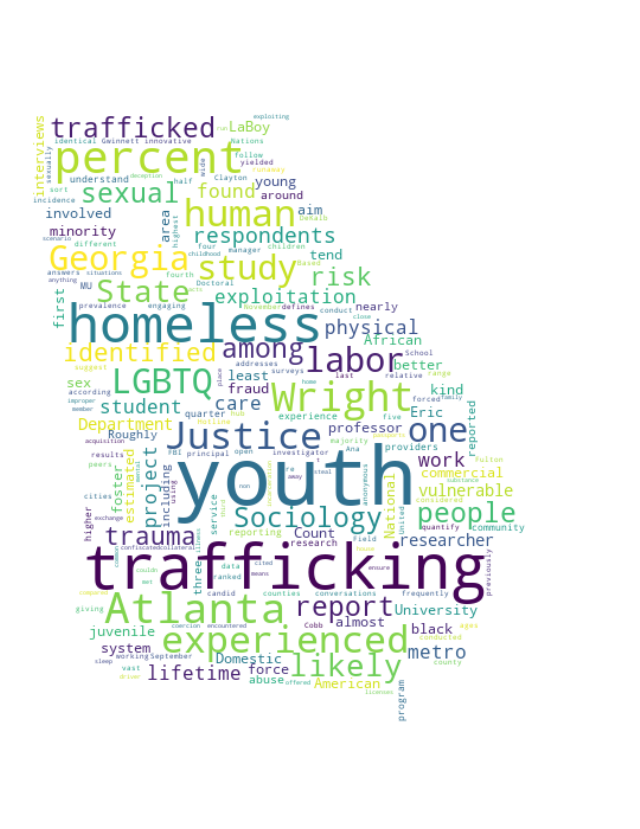

In [7]:
humant_wc = WordCloud(background_color='white',
                    stopwords = stopwordsm,
                    min_font_size = 4,
                    mask = atl_mask
                    ).generate(words)

fig = plt.figure(figsize=(20,15))
plt.imshow(humant_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. COVID Map in Georgia
Load the "Folium" library or install it if you don't have it already. Then Download the Georgia map jason file from the following link: https://drive.google.com/uc?id=1QJGLFcrj_rHBVJfnWAcK8TSuTTdXzroS

In [8]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium

In [9]:
import json
georgia_map = r'GA-counties.json'

Download the Georgia COVID data as of October 31st 2021 using the following codes:


In [10]:
#Download the dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=15bPCvtHStUS2YhokEwFvWOu4RvOpk93N


Downloading...
From: https://drive.google.com/uc?id=15bPCvtHStUS2YhokEwFvWOu4RvOpk93N
To: C:\Users\lanke\Data Visualisation\Georgia_COVID_as_of_10312021.xlsx

  0%|          | 0.00/20.1k [00:00<?, ?B/s]
100%|##########| 20.1k/20.1k [00:00<00:00, 20.0MB/s]


In [11]:
import pandas as pd
df_covid = pd.read_excel('Georgia_COVID_as_of_10312021.xlsx')

In [12]:
df_covid.head()

OBJECTID Countyname  ST_Name   FIPS  ST_ID         dt  Confirmed  Deaths  \
0    269854    Appling  Georgia  13001     13 2021-10-31       3496     103   
1    270509   Atkinson  Georgia  13003     13 2021-10-31       1571      37   
2    271164      Bacon  Georgia  13005     13 2021-10-31       2563      61   
3    271819      Baker  Georgia  13007     13 2021-10-31        368      14   
4    272474    Baldwin  Georgia  13009     13 2021-10-31       6664     188   

   Population  IncidenceRate  NewCases  
0       18386       19014.47         0  
1        8165       19240.66         0  
2       11164       22957.72         0  
3        3038       12113.23         0  
4       44890       14845.18         0

In [13]:
df_covid.rename(columns={'Countyname':'County_Name','dt':'Date','IncidenceRate':'Incidence_Rate','NewCases':'New_Cases'},inplace=True)

df_covid.columns = list(map(str, df_covid.columns))

df_covid.head()

OBJECTID County_Name  ST_Name   FIPS  ST_ID       Date  Confirmed  Deaths  \
0    269854     Appling  Georgia  13001     13 2021-10-31       3496     103   
1    270509    Atkinson  Georgia  13003     13 2021-10-31       1571      37   
2    271164       Bacon  Georgia  13005     13 2021-10-31       2563      61   
3    271819       Baker  Georgia  13007     13 2021-10-31        368      14   
4    272474     Baldwin  Georgia  13009     13 2021-10-31       6664     188   

   Population  Incidence_Rate  New_Cases  
0       18386        19014.47          0  
1        8165        19240.66          0  
2       11164        22957.72          0  
3        3038        12113.23          0  
4       44890        14845.18          0

### 2.1. Plot the "confirmed" cases across all the Georgia counties. 


In [14]:
geo_map = folium.Map(location=[32.748783,-84.388168],zoom_start=6.5)
geo_map

In [15]:
geo_map.choropleth(geo_data=georgia_map,
                    data=df_covid,
                    columns=['County_Name','Confirmed'],
                    key_on = 'feature.properties.NAME',
                    fill_color = 'YlOrRd',
                    fill_opacity = 0.7,
                    line_opacity = 0.4,
                    legend_name = 'Confirmed Covid Cases in each County'
                   )
geo_map

C:\Users\lanke\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 2.2. Do the same for "death".

In [16]:
geo_map = folium.Map(location=[32.748783,-84.388168],zoom_start=6.5)


In [17]:
geo_map.choropleth(geo_data=georgia_map,
                    data=df_covid,
                    columns=['County_Name','Deaths'],
                    key_on = 'feature.properties.NAME',
                    fill_color = 'YlGnBu',
                    fill_opacity = 0.7,
                    line_opacity = 0.4,
                    legend_name = 'Deaths due to Covid in each County'
                   )
geo_map

### 2.3. Add a new variable named "covid_per_capita" as "confirmed" divided by "population". Then plot the covid_per_capita on Georgia map.

In [18]:
df_covid['Covid_Per_Capita'] = round(df_covid['Confirmed']/df_covid['Population'],3)
df_covid.head()

OBJECTID County_Name  ST_Name   FIPS  ST_ID       Date  Confirmed  Deaths  \
0    269854     Appling  Georgia  13001     13 2021-10-31       3496     103   
1    270509    Atkinson  Georgia  13003     13 2021-10-31       1571      37   
2    271164       Bacon  Georgia  13005     13 2021-10-31       2563      61   
3    271819       Baker  Georgia  13007     13 2021-10-31        368      14   
4    272474     Baldwin  Georgia  13009     13 2021-10-31       6664     188   

   Population  Incidence_Rate  New_Cases  Covid_Per_Capita  
0       18386        19014.47          0             0.190  
1        8165        19240.66          0             0.192  
2       11164        22957.72          0             0.230  
3        3038        12113.23          0             0.121  
4       44890        14845.18          0             0.148

In [19]:
print ('data dimensions:', df_covid.shape)

data dimensions: (161, 12)


In [20]:
df_covid = df_covid[np.isfinite(df_covid['Covid_Per_Capita'])]
df_covid

OBJECTID County_Name  ST_Name   FIPS  ST_ID       Date  Confirmed  \
0      269854     Appling  Georgia  13001     13 2021-10-31       3496   
1      270509    Atkinson  Georgia  13003     13 2021-10-31       1571   
2      271164       Bacon  Georgia  13005     13 2021-10-31       2563   
3      271819       Baker  Georgia  13007     13 2021-10-31        368   
4      272474     Baldwin  Georgia  13009     13 2021-10-31       6664   
..        ...         ...      ...    ...    ...        ...        ...   
154    370724   Whitfield  Georgia  13313     13 2021-10-31      22625   
155    371379      Wilcox  Georgia  13315     13 2021-10-31       1276   
156    372034      Wilkes  Georgia  13317     13 2021-10-31       1551   
157    372689   Wilkinson  Georgia  13319     13 2021-10-31       1500   
158    373344       Worth  Georgia  13321     13 2021-10-31       3057   

     Deaths  Population  Incidence_Rate  New_Cases  Covid_Per_Capita  
0       103       18386        19014.47          0             0.190  
1        37        8165        19240.66          0             0.192  
2        61       11164        22957.72          0             0.230  
3        14        3038        12113.23          0             0.121  
4       188       44890        14845.18          0             0.148  
..      ...         ...             ...        ...               ...  
154     336      104628        21624.23          0             0.216  
155      57        8635        14777.07          0             0.148  
156      36        9777        15863.76          0             0.159  
157      43        8954        16752.29          0             0.168  
158      91       20247        15098.53          0             0.151  

[159 rows x 12 columns]

In [21]:
geo_map = folium.Map(location=[32.748783,-84.388168],zoom_start=6.5)

In [22]:
geo_map.choropleth(geo_data=georgia_map,
                    data=df_covid,
                    columns=['County_Name','Covid_Per_Capita'],
                    key_on = 'feature.properties.NAME',
                    fill_color = 'RdYlBu',
                    fill_opacity = 0.5,
                    line_opacity = 0.4,
                    legend_name = 'Covid Per Capity in Georgia'
                   )
geo_map

C:\Users\lanke\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 2.4. Which county has the highest covid_per_capita? 

We can observe from the above Choropleth map which we have constructed to get the 'covid_per_capita' counts, that the county which has the Highest Covid_Per_Capita is **Chattahoochee County**. It has the covid_per_capita proportion of 0.542.